In [172]:
import numpy as np
import matplotlib.pyplot as plt

## Change of Meausrement for the normal variable

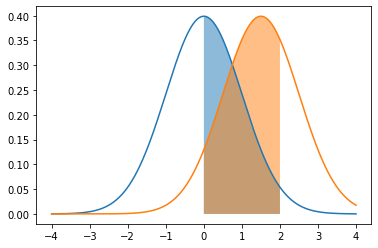

In [173]:
import numpy as np
import scipy.stats as stats
mu=0;sig=1;drift=1.5
x = np.linspace(-4, 4, 10000)
plt.plot(x, stats.norm.pdf(x, mu, sig))
plt.plot(x, stats.norm.pdf(x, mu+drift, sig))

#generate the pdf function
Z1 = lambda x: np.exp(x*drift-0.5*drift**2)
X1 = lambda x: 1/(2*np.pi)**0.5 *np.exp(-0.5*x**2)
Y1 = lambda x: 1/(2*np.pi)**0.5 *np.exp(-0.5*(x-drift)**2)

# we are interested about are A [0,2]
section = np.linspace(0,2,1000)

#dash the  prob integral of interested area
plt.fill_between(section,X1(section),alpha=0.5)

plt.fill_between(section,Y1(section),alpha=0.5)

# the the integral share some common area
plt.show()

In [217]:
# we get X under P measure integrated for area A [0,2]
Xp = integrate.quad(X1,0,2)
Xp

(0.47724986805182085, 5.298537920104494e-15)

In [218]:
# we get X under Q measure integrated for area A [0,2]
Yp = integrate.quad(Y1,0,2)
Yp

(0.6246552600051551, 6.9350665211093695e-15)

In [219]:
# X under Q measure for area A is equal the integral for (Radon Nikogym derivate * pdf under P measure)
XZ1=lambda x: np.exp(x*drift-0.5*drift**2)*1/(2*np.pi)**0.5 *np.exp(-0.5*x**2)
Zp = integrate.quad(XZ1,0,2)
Zp

(0.6246552600051551, 6.9350665211093695e-15)

In [177]:
#verify via cdf integral
stats.norm.cdf([0,2],0+drift,1)[1]

0.6914624612740131

In [178]:
stats.norm.cdf([0,2],0+drift,1)[1]-stats.norm.cdf([0,2],0+drift,1)[0]

0.624655260005155

## change of measure for ABM

In [ ]:
# begin with the change of measurement for one random variable under normal distribution
# if we think about the finite dimensional constructed by discrete subsets
# reducing the deltaT it can eventually converges to BM

# first calculate for ABM for easier derivation

In [261]:
deltaT = 1/2520; 
def generate_ABM_path(days,start,drift,sigma):
    S_path=[start]
    for i in range(days):
        S_next = S_path[-1] + drift*deltaT + sigma*deltaT**0.5*np.random.normal(0,1,1)[0]
        S_path.append(S_next)
    
    return S_path   

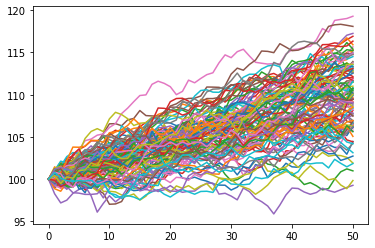

In [251]:
# with strong drift
import matplotlib.pyplot as plt
S0=100;mu=50;sig = 10;
D = np.linspace(0,50,51)
for i in range(100):
    plt.plot(generate_ABM_path(50,S0,mu,sig))
plt.show()

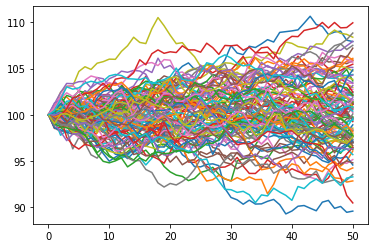

In [252]:
#with 0 drift
S0=100;mu=50;sig = 10;
D = np.linspace(0,50,51)
np.random.seed(40)
for i in range(100):
    plt.plot(generate_ABM_path(50,S0,0,sig))
plt.show()

In [253]:
# calculate the radon nikodym derivate
np.random.seed(40)
radon_n_d = np.exp(-mu*deltaT/sig*deltaT**0.5*np.random.normal(0,1,1)[0]-0.5*(mu*deltaT/sig*deltaT**0.5)**2*deltaT)
print(radon_n_d)
def generate_ABM_changeofmeasurment(days, start, drift, sigma):
    S_path=[start]
    for i in range(days):
        Bt = np.random.normal(0,1,1)[0]
        
        radon_n_d = np.exp((-drift*deltaT)/(sigma*deltaT**0.5)*Bt-0.5*((-drift*deltaT)/(sigma*deltaT**0.5))**2*deltaT)
        S_next = (S_path[-1] + (drift*deltaT + sigma*deltaT**0.5*Bt) * radon_n_d)
        S_path.append(S_next)
    
    return S_path     

1.0007596485320147


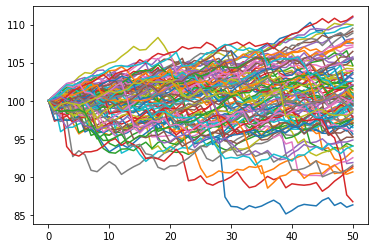

In [254]:
#change of measure
np.random.seed(40)
for i in range(100):
    plt.plot(generate_ABM_changeofmeasurment(50,S0,mu,sig))
plt.show()

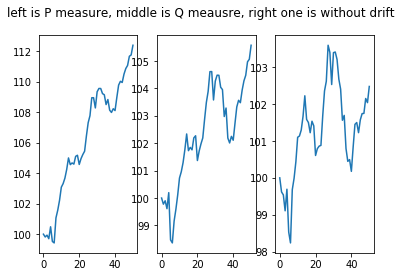

In [255]:
#subplot side by side to see the trick

fig, (ax1, ax2,ax3) = plt.subplots(1, 3)
fig.suptitle('left is P measure, middle is Q meausre, right one is without drift')
np.random.seed(40)
ax1.plot(generate_ABM_path(50,S0,mu,sig))
np.random.seed(40)
ax2.plot(generate_ABM_changeofmeasurment(50,S0,mu,sig))
np.random.seed(40)
ax3.plot(generate_ABM_path(50,S0,0,sig))

In [260]:
import pandas as pd
days = 50
Paths_P=[];np.random.seed(40)
for i in range(10000):
    Paths_P.append(generate_ABM_path(days,S0,mu,sig))
D2= pd.DataFrame(Paths_P)
print(D2[50].describe())
print("-------------")

Paths_Q=[];
np.random.seed(40)
for i in range(10000):
    Paths_Q.append(generate_ABM_changeofmeasurment(days,S0,mu,sig))
D2= pd.DataFrame(Paths_Q)
print(D2[50].describe())
print("-------------")
Paths_W=[];
np.random.seed(40)
for i in range(10000):
    Paths_W.append(generate_ABM_path(days,S0,0,sig))
D2= pd.DataFrame(Paths_W)
print(D2[50].describe())

count    10000.000000
mean       110.002886
std          4.447501
min         91.643963
25%        107.017065
50%        109.950596
75%        112.964976
max        126.735254
Name: 50, dtype: float64
-------------
count    10000.000000
mean       100.092280
std          5.128344
min         76.709652
25%         96.752610
50%        100.320507
75%        103.648142
max        116.202775
Name: 50, dtype: float64
-------------
count    10000.000000
mean       100.082251
std          4.447501
min         81.723328
25%         97.096430
50%        100.029961
75%        103.044341
max        116.814619
Name: 50, dtype: float64


In [262]:
# change deltaT = 1/2520 and see the distribution on 50/2520
import pandas as pd
days = 500
Paths_P=[];np.random.seed(40)
for i in range(10000):
    Paths_P.append(generate_ABM_path(days,S0,mu,sig))
D2= pd.DataFrame(Paths_P)
print(D2[50].describe())
print("-------------")

Paths_Q=[];
np.random.seed(40)
for i in range(10000):
    Paths_Q.append(generate_ABM_changeofmeasurment(days,S0,mu,sig))
D2= pd.DataFrame(Paths_Q)
print(D2[50].describe())
print("-------------")
Paths_W=[];
np.random.seed(40)
for i in range(10000):
    Paths_W.append(generate_ABM_path(days,S0,0,sig))
D2= pd.DataFrame(Paths_W)
print(D2[50].describe())

count    10000.000000
mean       100.986489
std          1.405153
min         95.342589
25%        100.045875
50%        100.982760
75%        101.942864
max        106.706868
Name: 50, dtype: float64
-------------
count    10000.000000
mean        99.994040
std          1.427991
min         93.957737
25%         99.039893
50%        100.006583
75%        100.974678
max        105.351406
Name: 50, dtype: float64
-------------
count    10000.000000
mean        99.994426
std          1.405153
min         94.350525
25%         99.053812
50%         99.990696
75%        100.950801
max        105.714805
Name: 50, dtype: float64


In [263]:
# change deltaT = 1/2520 and see the distribution on 500/2520
import pandas as pd
days = 500
Paths_P=[];np.random.seed(40)
for i in range(10000):
    Paths_P.append(generate_ABM_path(days,S0,mu,sig))
D2= pd.DataFrame(Paths_P)
print(D2[days].describe())
print("-------------")

Paths_Q=[];
np.random.seed(40)
for i in range(10000):
    Paths_Q.append(generate_ABM_changeofmeasurment(days,S0,mu,sig))
D2= pd.DataFrame(Paths_Q)
print(D2[days].describe())
print("-------------")
Paths_W=[];
np.random.seed(40)
for i in range(10000):
    Paths_W.append(generate_ABM_path(days,S0,0,sig))
D2= pd.DataFrame(Paths_W)
print(D2[days].describe())

count    10000.000000
mean       110.003886
std          4.496854
min         91.079774
25%        106.985334
50%        110.012498
75%        113.026175
max        127.397929
Name: 500, dtype: float64
-------------
count    10000.000000
mean       100.077118
std          4.557787
min         80.498538
25%         97.002339
50%        100.097307
75%        103.131754
max        118.570218
Name: 500, dtype: float64
-------------
count    10000.000000
mean       100.083251
std          4.496854
min         81.159139
25%         97.064699
50%        100.091863
75%        103.105540
max        117.477294
Name: 500, dtype: float64


In [271]:
# focus on the std we can find the following results
# the change of measure from P to Q will yield the larger std than zero-drift
# it depends heavily on the length of simulation and the deltaT

#the smaller delta T and smaller length of predication will yield less overestimation

# with delta T = 1/252 and days = 50/252
print("under delta T = 1/252 and days = 50/252 the std will be larger than %.3f%%" % (5.128344/4.447501*100-100))

under delta T = 1/252 and days = 50/252 the std will be larger than 15.308%


In [272]:
print("under delta T = 1/2520 and days = 50/2520 the std will be larger than %.3f%%" % (1.427991/1.405153*100-100))

under delta T = 1/2520 and days = 50/2520 the std will be larger than 1.625%


In [273]:
print("under delta T = 1/2520 and days = 500/2520 the std will be larger than %.3f%%" % (4.557787/4.496854*100-100))

under delta T = 1/2520 and days = 500/2520 the std will be larger than 1.355%


## Change of measure of GBM


In [370]:
#GBM drift and sigma all should be like % range
def generate_GBM_path(days,start,drift,sigma):
    S_path=[start]
    for i in range(days):
        S_next = S_path[-1] * np.exp( (drift-0.5*sigma**2)*deltaT + sigma*deltaT**0.5*np.random.normal(0,1,1)[0])
        S_path.append(S_next)
    
    return S_path   

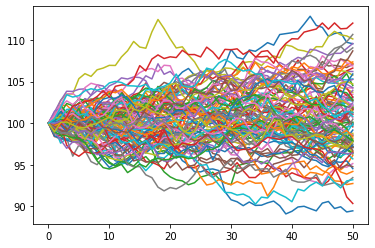

In [442]:
D = np.linspace(0,50,51)
deltaT = 1/252
np.random.seed(40)
for i in range(100):
    plt.plot(generate_GBM_path(50,S0,0.25,0.35))
plt.show()

In [437]:
Paths=[];
np.random.seed(40)
for i in range(1000):
    Paths.append(generate_GBM_path(50,S0,0.25,0.35))
D2= pd.DataFrame(Paths)
D2[50].describe()

count    1000.000000
mean      105.290406
std        16.596175
min        68.033176
25%        93.040049
50%       103.600569
75%       116.572468
max       166.219118
Name: 50, dtype: float64

In [438]:
def generate_GBM_changeofmeasure(days, start, drift, sigma):
    S_path=[start]
    for i in range(days):
        Bt = np.random.normal(0,1,1)[0]
        
        m1 = (drift * deltaT-0.5*(sigma*deltaT**0.5)**2)/(sigma*deltaT**0.5
                                                         )
        radon_n_d = np.exp(-m1*Bt-0.5*(m1)**2*deltaT)
        
        S_next = S_path[-1] * ((np.exp( (drift-0.5*sigma**2)*deltaT + sigma*deltaT**0.5*Bt)-1)*(radon_n_d)+1)
        
        #print(np.exp( (drift-0.5*sigma**2)*deltaT + sigma*deltaT**0.5*Bt))
        S_path.append(S_next)
    
    return S_path  

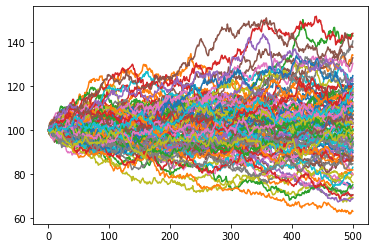

In [444]:
D = np.linspace(0,50,51)
deltaT = 1/2520
np.random.seed(40)
for i in range(100):
    plt.plot(generate_GBM_changeofmeasure(500,S0,0.25,0.35))
plt.show()

In [446]:
Paths=[];
np.random.seed(40)
for i in range(10000):
    Paths.append(generate_GBM_changeofmeasurment(500,S0,0.25,0.35))
D2= pd.DataFrame(Paths)
D2[500].describe()

count    10000.000000
mean       101.538309
std         16.066149
min         51.604358
25%         90.250002
50%        100.309760
75%        111.482377
max        185.098772
Name: 500, dtype: float64

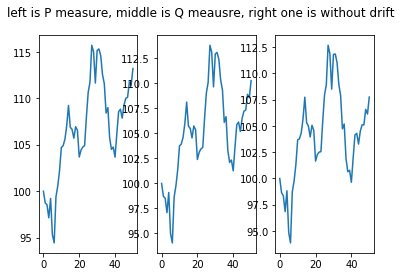

In [441]:
#subplot side by side to see the trick
S0=100;mu=0.25;
fig, (ax1, ax2,ax3) = plt.subplots(1, 3)
fig.suptitle('left is P measure, middle is Q meausre, right one is without drift')
np.random.seed(40)
ax1.plot(generate_GBM_path(50,S0,mu,sig))
np.random.seed(40)
ax2.plot(generate_GBM_changeofmeasurment(50,S0,mu,sig))
np.random.seed(40)
ax3.plot(generate_GBM_path(50,S0,0,sig))